# Taller 1: Regresión con Random Forest y Gradient Boosting


En este taller se aplicará ensambes de árboles de decisión tipo random forest y gradient boosting a un conjunto de datos de jugadores del video juego FIFA 19. Los datos utilizados son un subconjunto modificado de [este set de datos](https://www.kaggle.com/karangadiya/fifa19) y se encuentran en el archivo `FIFA 19 players.csv`. La tarea a realizar consiste en predecir el salario (wage) de los jugadores.

**Integrantes**

Andres Felipe Morales Martinez,

Laura Margarita Guerrero Guerra,

Sun Yin Huang Huang,

Giovanny Gomez Convers

In [101]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    #BinaryEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

In [102]:
pip install category_encoders


In [103]:
from category_encoders import BinaryEncoder

In [104]:
#Obtenemos los datos
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YkEYndYcq8Lhtx6KnGFBjUGguaP6wVwE' -O players.csv

--2023-11-02 06:20:02--  https://docs.google.com/uc?export=download&id=1YkEYndYcq8Lhtx6KnGFBjUGguaP6wVwE
Resolving docs.google.com (docs.google.com)... 173.194.216.102, 173.194.216.113, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9gq87h76okk9hu7hal29ok842cogpmv9/1698906000000/15315348669826032119/*/1YkEYndYcq8Lhtx6KnGFBjUGguaP6wVwE?e=download&uuid=cea89bc1-5b87-4993-9395-f1bc6ccd68a1 [following]
--2023-11-02 06:20:03--  https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9gq87h76okk9hu7hal29ok842cogpmv9/1698906000000/15315348669826032119/*/1YkEYndYcq8Lhtx6KnGFBjUGguaP6wVwE?e=download&uuid=cea89bc1-5b87-4993-9395-f1bc6ccd68a1
Resolving doc-0s-6c-docs.googleusercontent.com (doc-0s-6c-docs.googleusercontent.com)... 74.125.134.132, 2607:f

In [105]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

In [106]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

# Preprocesamiento de datos

In [107]:
# Carguemos los datos:
data = pd.read_csv('players.csv')
data

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,94,565000,Left,5.0,4.0,4.0,90.0,90.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,94,405000,Right,5.0,4.0,5.0,94.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,92,290000,Right,5.0,5.0,5.0,87.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,K. De Bruyne,27,91,355000,Right,4.0,5.0,4.0,85.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
4,E. Hazard,27,91,340000,Right,4.0,4.0,4.0,86.0,86.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,J. Lundstram,19,47,1000,Right,1.0,2.0,2.0,44.0,44.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
15922,N. Christoffersson,19,47,1000,Right,1.0,2.0,2.0,47.0,47.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
15923,B. Worman,16,47,1000,Right,1.0,3.0,2.0,47.0,47.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
15924,D. Walker-Rice,17,47,1000,Right,1.0,3.0,2.0,49.0,49.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [108]:
print(f'El tamaño del dataset es: {data.shape}')

El tamaño del dataset es: (15926, 63)


In [109]:
# Veamos info del dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      15926 non-null  object 
 1   Age                       15926 non-null  int64  
 2   Overall                   15926 non-null  int64  
 3   Wage                      15926 non-null  int64  
 4   Preferred Foot            15926 non-null  object 
 5   International Reputation  15926 non-null  float64
 6   Weak Foot                 15926 non-null  float64
 7   Skill Moves               15926 non-null  float64
 8   LS                        15926 non-null  float64
 9   ST                        15926 non-null  float64
 10  RS                        15926 non-null  float64
 11  LW                        15926 non-null  float64
 12  LF                        15926 non-null  float64
 13  CF                        15926 non-null  float64
 14  RF    

In [110]:
# Veamos la descripción del dataset:
data.describe(include='all')

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,15926,15926.000000,15926.000000,15926.000000,15926,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,...,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.00000,15926.000000,15926.000000,15926.000000
unique,15114,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,J. Rodríguez,NaN,NaN,NaN,Right,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,11969,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.991209,66.446189,10254.866256,NaN,1.116037,3.004081,2.533342,59.842647,59.842647,...,51.446126,59.575411,50.401168,54.844405,55.494726,52.118234,60.34654,51.273703,51.883021,49.593118
std,NaN,4.552866,6.809244,22692.769542,NaN,0.397762,0.636845,0.618186,9.141407,9.141407,...,15.718376,14.432944,18.797738,14.665434,12.897478,12.501841,10.14202,17.198926,19.161875,19.162508
min,NaN,16.000000,46.000000,1000.000000,NaN,1.000000,1.000000,2.000000,33.000000,33.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.00000,10.000000,10.000000,10.000000
25%,NaN,21.000000,62.000000,1000.000000,NaN,1.000000,3.000000,2.000000,54.000000,54.000000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.00000,37.000000,35.000000,32.000000
50%,NaN,25.000000,66.000000,3000.000000,NaN,1.000000,3.000000,2.000000,60.000000,60.000000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.00000,56.000000,59.000000,56.000000
75%,NaN,28.000000,71.000000,10000.000000,NaN,1.000000,3.000000,3.000000,66.000000,66.000000,...,64.000000,70.000000,65.000000,65.000000,65.000000,61.000000,68.00000,65.000000,67.000000,65.000000


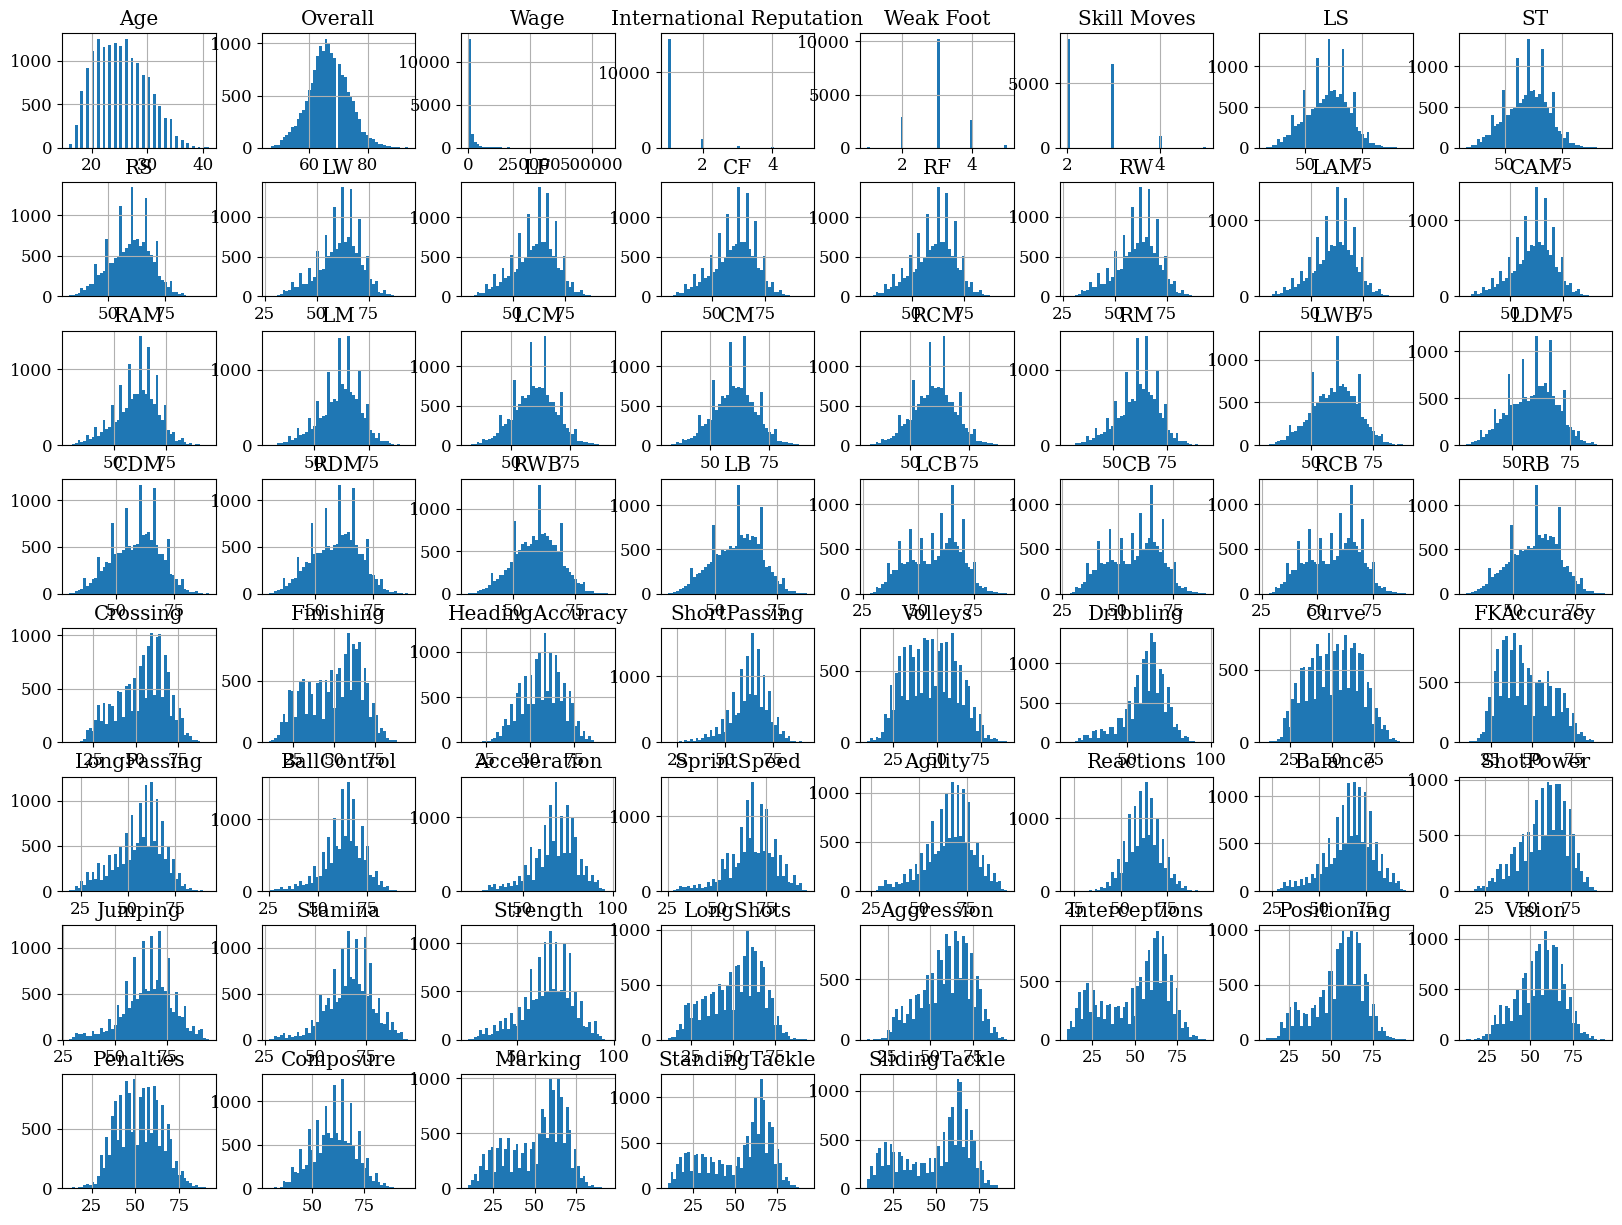

In [111]:
#Veamos la distribución de las columnas
data.hist(bins=50, figsize=(20, 15));

In [112]:
# Obtengamos la distribución de valores de la variable `Preferred Foot`:
# tip: pandas function value_counts()
### CÓDIGO AQUÍ ###
data.value_counts("Preferred Foot")

Preferred Foot
Right    11969
Left      3957
dtype: int64

In [113]:
# Obtengamos la distribución de valores de la variable 'Name' pues se observan registros repetidos
data.value_counts("Name")

Name
J. Rodríguez      9
Paulinho          8
J. Williams       7
J. Hernández      6
R. Williams       6
                 ..
G. Pazzini        1
G. Pender         1
G. Perea          1
G. Pereiro        1
Óscar Valentín    1
Length: 15114, dtype: int64

In [114]:
# Estos valores repetidos los eliminamos pues tienen valores diferentes que pueden afectar la predicción de los datos
# Eliminamos los duplicados en la columna 'Name' y conservamos la primera ocurrencia
data = data.drop_duplicates(subset='Name', keep='first')


In [115]:
# Volvemos a revisar distribución de valores de la variable 'Name'
data.value_counts("Name")

Name
A. Abang          1
M. Sahanek        1
M. Ríos           1
M. Röser          1
M. Rømer          1
                 ..
G. Kyei           1
G. Kılıç          1
G. Kımışır        1
G. Laborde        1
Óscar Valentín    1
Length: 15114, dtype: int64

In [116]:
# Volvemos a revisar distribución de valores de la variable 'Preferred Foot'
data.value_counts("Preferred Foot")

Preferred Foot
Right    11364
Left      3750
dtype: int64

In [117]:
# Veamos info del dataset actualizado:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15114 entries, 0 to 15925
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      15114 non-null  object 
 1   Age                       15114 non-null  int64  
 2   Overall                   15114 non-null  int64  
 3   Wage                      15114 non-null  int64  
 4   Preferred Foot            15114 non-null  object 
 5   International Reputation  15114 non-null  float64
 6   Weak Foot                 15114 non-null  float64
 7   Skill Moves               15114 non-null  float64
 8   LS                        15114 non-null  float64
 9   ST                        15114 non-null  float64
 10  RS                        15114 non-null  float64
 11  LW                        15114 non-null  float64
 12  LF                        15114 non-null  float64
 13  CF                        15114 non-null  float64
 14  RF    

In [118]:
print(f'El tamaño del dataset actualizado es: {data.shape}')

El tamaño del dataset actualizado es: (15114, 63)


In [119]:
# Veamos la descripción del dataset actualizado:
data.describe(include='all')

,Name,Age,Overall,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,LS,ST,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,15114,15114.000000,15114.000000,15114.000000,15114,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,...,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000
unique,15114,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,L. Messi,NaN,NaN,NaN,Right,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,11364,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.044330,66.599643,10558.422654,NaN,1.120286,3.010586,2.540757,59.992127,59.992127,...,51.650258,59.759164,50.583631,55.009395,55.693860,52.209342,60.534141,51.392484,52.043271,49.728927
std,NaN,4.544335,6.818052,23191.362006,NaN,0.405034,0.638034,0.620851,9.154526,9.154526,...,15.738389,14.416871,18.777588,14.681372,12.922831,12.528403,10.153643,17.216861,19.162484,19.170257
min,NaN,16.000000,46.000000,1000.000000,NaN,1.000000,1.000000,2.000000,33.000000,33.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000
25%,NaN,21.000000,62.000000,2000.000000,NaN,1.000000,3.000000,2.000000,54.000000,54.000000,...,40.000000,50.000000,34.000000,47.000000,47.000000,43.000000,54.000000,37.000000,35.000000,32.000000
50%,NaN,25.000000,67.000000,3000.000000,NaN,1.000000,3.000000,2.000000,61.000000,61.000000,...,54.000000,61.000000,56.000000,58.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000
75%,NaN,28.000000,71.000000,10000.000000,NaN,1.000000,3.000000,3.000000,66.000000,66.000000,...,64.000000,70.000000,65.000000,66.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000


In [120]:
# Al realizar BinaryEncoder a 'Preferred Foot' se crea una columna adicional

# Crear una instancia de BinaryEncoder
encoder = BinaryEncoder(cols=['Preferred Foot'])

# Ajustar y transformar a un nuevo dataframe
data_encoded = encoder.fit_transform(data)

# Ver el DataFrame codificado
#print(data_encoded)

# Verificar cantidad
#data_encoded.value_counts("Preferred Foot_0") #Right
#data_encoded.value_counts("Preferred Foot_1") #Left

#Para que en datos de entrenamiento se dejen las mismas columnas las eliminamos y tomamos sus nombres
data_encoded = data_encoded.drop(columns=["Wage", "Name"])

#Saber una columna. inicia en 0
#data_encoded.iloc[:, 0]

# Regresión

**Nota:** Dejaremos la coulmna `Name` en el datafrme para poder identificar a los jugadores, pero **la debemos excluir** al definir las variables `X_train`, `y_train`, `X_val`, `y_val`, `X_test`, and `y_test`.

In [121]:
# Separemos los datos en conjuntos de entrenamiento (80 %) y prueba (20 %):
### CÓDIGO AQUÍ ###
# Separamos un nuevo dataframe X que no tenga la columna Wage(salario)
X = data.drop(columns=["Wage", "Name"], axis=1)

# Separamos otro dataframe y (variable objetivo) que solo tenga la columna de salario (prediccion)
y = data["Wage"]

# Separamos los conjuntos X y 'y' en datos de entrenamiento(70), validacion(15) y prueba(15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Guardemos los nombres de los jugadores
player_names = data["Name"]



In [122]:
#Definimos las transformaciones
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

categorical_transformer = Pipeline(steps=[
    ('BinaryEncoder', BinaryEncoder(cols=['Preferred Foot']))
])
numerical_transformer = 'passthrough'


In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),
        ('num', numerical_transformer, num_cols)
    ])

In [124]:
#Definimos nuestro regresor
rf_base = RandomForestRegressor(random_state=random_state)
gb_base = GradientBoostingRegressor(random_state=random_state)

#Definimos los pipelines
#('BinaryEncoder', BinaryEncoder(cols=['Preferred Foot'])),
pipeline_rf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', rf_base),
    ])
#('BinaryEncoder', BinaryEncoder(cols=['Preferred Foot'])),
pipeline_gb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', gb_base),
    ])

# Define la cuadrícula de parámetros para Random Forest
param_grid_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_leaf': [10, 300, 2000]
}

# Define la cuadrícula de parámetros para Gradient Boosting
param_grid_gb = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_leaf': [10, 300, 2000]
}

# Crear GridSearchCV para Random Forest y Gradient Boosting
grid_search_rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid_rf, n_jobs=-1)
grid_search_gb = GridSearchCV(pipeline_gb, cv=3, param_grid=param_grid_gb, n_jobs=-1)


In [125]:
%%time
# Entrenemos el random forest:
grid_search_rf.fit(X_train, y_train)
# Entrenemos el gradient boosting:
grid_search_gb.fit(X_train, y_train)


CPU times: user 17.7 s, sys: 718 ms, total: 18.5 s
Wall time: 5min 5s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('BinaryEncoder',
                                                                                          BinaryEncoder(cols=['Preferred '
                                                                                                              'Foot']))]),
                                                                         Index(['Preferred Foot'], dtype='object')),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['Age', 'Overall', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',...
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object'))])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [3, 4, 5],
                         'regressor__min_samples_leaf': [10, 300, 2000],
                         'regressor__n_estimators': [50, 100]})

In [126]:
print(grid_search_rf.best_params_)
print(grid_search_gb.best_params_)

{'regressor__max_depth': 5, 'regressor__min_samples_leaf': 10, 'regressor__n_estimators': 100}
{'regressor__max_depth': 4, 'regressor__min_samples_leaf': 10, 'regressor__n_estimators': 50}


In [127]:
# Obtengamos el R^2 y el MAE de entrenamiento para cada modelo:
print("Train set")
for model in (grid_search_rf, grid_search_gb):
    print(f"Model: {'Random Forest' if model == grid_search_rf else 'Gradient Boosting'}")
    print(f'R^2: {model.score(X_train, y_train)}')
    print(f'MAE: {mean_absolute_error(y_train, model.predict(X_train))}')
    print('\n')

print("Test set")
for model in (grid_search_rf, grid_search_gb):
    print(f"Model: {'Random Forest' if model == grid_search_rf else 'Gradient Boosting'}")
    print(f'R^2: {model.score(X_test, y_test)}')
    print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
    print('\n')

Train set
Model: Random Forest
R^2: 0.8045452663091383
MAE: 4690.16121555784


Model: Gradient Boosting
R^2: 0.865946130219015
MAE: 4270.094684566137


Test set
Model: Random Forest
R^2: 0.7645673435482959
MAE: 5189.961755414218


Model: Gradient Boosting
R^2: 0.7589004807637143
MAE: 5083.526063891655




In [128]:
# Ver las predicciones para Random Forest y Gradient Boosting
rf_predictions = grid_search_rf.predict(X_test)
gb_predictions = grid_search_gb.predict(X_test)

# Unir datos de prueba, las predicciones y los nombres de los jugadores
result_df = pd.DataFrame({
    'Player Name': player_names[X_test.index],  # Usar los índices correspondientes
    'Actual Wage': y_test,
    'Random Forest Predictions': rf_predictions,
    'Gradient Boosting Predictions': gb_predictions
})

print(result_df)


         Player Name  Actual Wage  Random Forest Predictions  \
4447    M. Danielson         4000                8126.581039   
3130      D. N'Dinga        10000               13446.625757   
6252         V. Bora         6000                5191.732881   
9449       D. Andrew         3000                3267.367373   
4143      R. Herrera        18000                9884.357399   
...              ...          ...                        ...   
13887  D. Bajselmani         1000                1649.116804   
12572      M. Harzan         4000                1972.183408   
9979      R. Marquez         2000                2487.917326   
5026      A. Lusamba        12000                9604.153451   
14837     M. Shinada         1000                1649.116804   

       Gradient Boosting Predictions  
4447                     8089.466507  
3130                    11430.018908  
6252                     5339.273934  
9449                     3124.760512  
4143                     9876.373763

# Explicabilidad

In [129]:
!pip install shap

In [130]:
import shap
from IPython.display import HTML

In [131]:
# Entrenamos nuestro pipeline con los mejores parámetros encontrados en la validación cruzada
pipeline_gb.set_params(**grid_search_gb.best_params_)
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('BinaryEncoder',
                                                                   BinaryEncoder(cols=['Preferred '
                                                                                       'Foot']))]),
                                                  Index(['Preferred Foot'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Age', 'Overall', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM'...
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object'))])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=10,
                                           n_estimators=50, random_state=42))])

In [132]:
# Aplicamos el preproceso a los datos
X_train_preprocessed = pipeline_gb.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = pipeline_gb.named_steps['preprocessor'].transform(X_test)

In [133]:
# Antes de crear el explainer, establecer los nombres de las características para visualizar
feature_names_encoded = data_encoded.columns.tolist()  # lo teniamos antes de iniciar regresion en data_encoded
gb_explainer = shap.TreeExplainer(pipeline_gb.named_steps["regressor"])

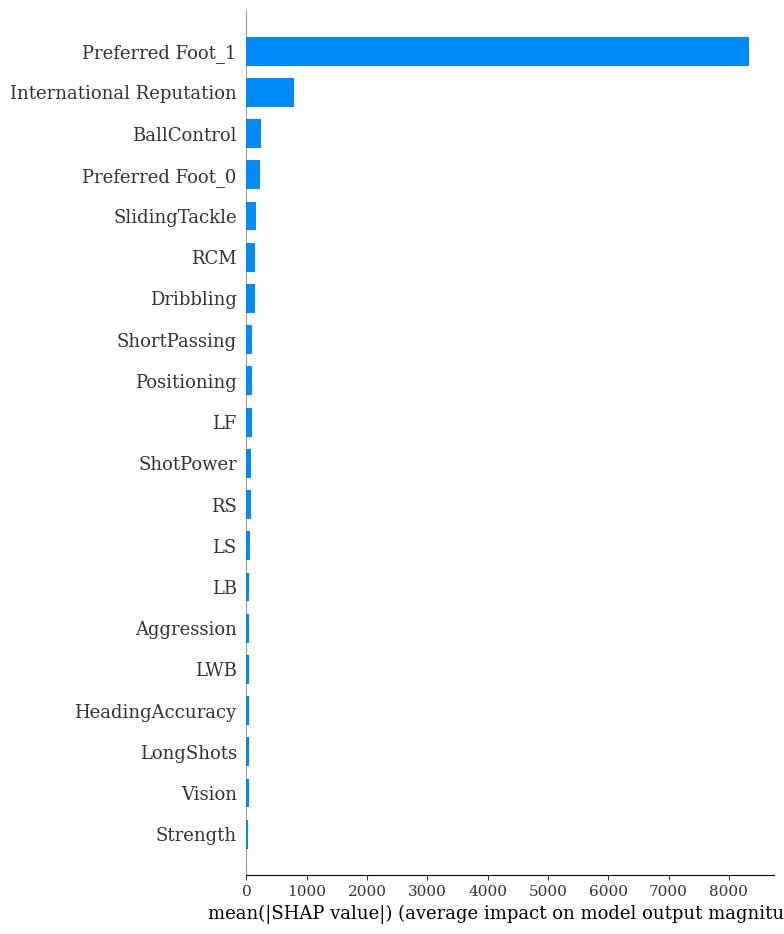

In [134]:
# Summary plot
shap.summary_plot(train_gb_shap_values, X_train_preprocessed, plot_type="bar", feature_names=feature_names_encoded) #Feature 3 --> Left
#shap.summary_plot(train_gb_shap_values, X_train_preprocessed, plot_type="bar")

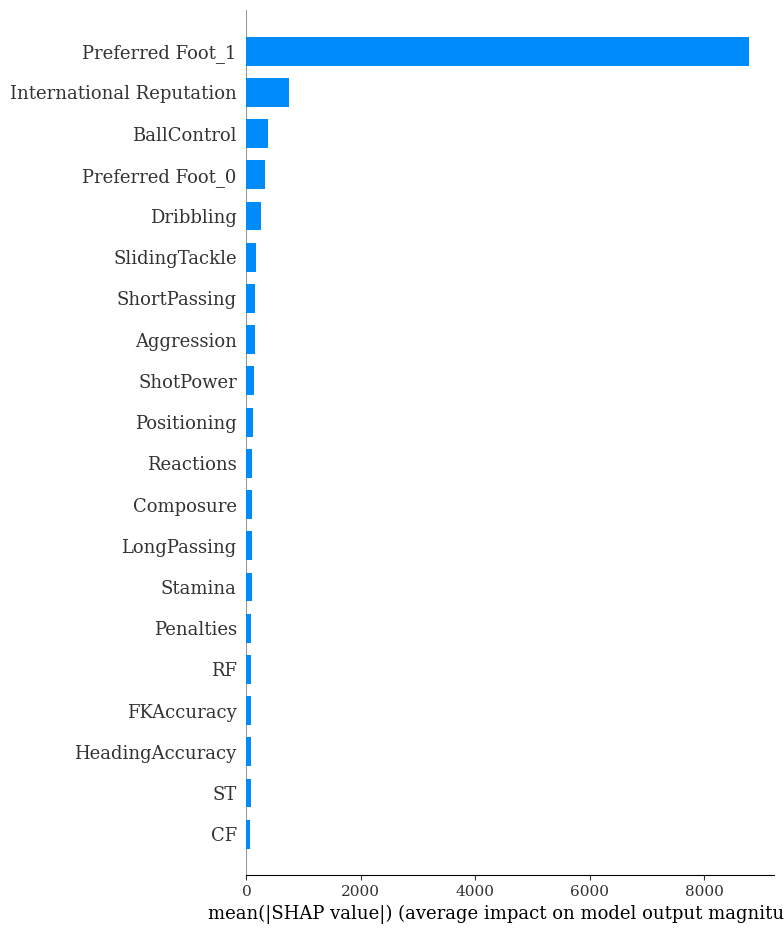

In [135]:
# Grafiquemos los valores SHAP para un ejemplo del conjunto de test
test_gb_shap_values = gb_explainer.shap_values(X_test_preprocessed)
shap.summary_plot(test_gb_shap_values, X_test_preprocessed, plot_type="bar",feature_names=feature_names_encoded)

In [136]:
# Crear una instancia de BinaryEncoder
encoder = BinaryEncoder(cols=['Preferred Foot'])

# Ajustar y transformar a un nuevo dataframe con caracteristicas transformadas
X_test_encoded = encoder.fit_transform(X_test)

In [137]:
# Crea un objeto Explainer para tu modelo
explainer = shap.TreeExplainer(pipeline_gb.named_steps["regressor"])

In [138]:
shap_values = explainer(X_test_encoded)

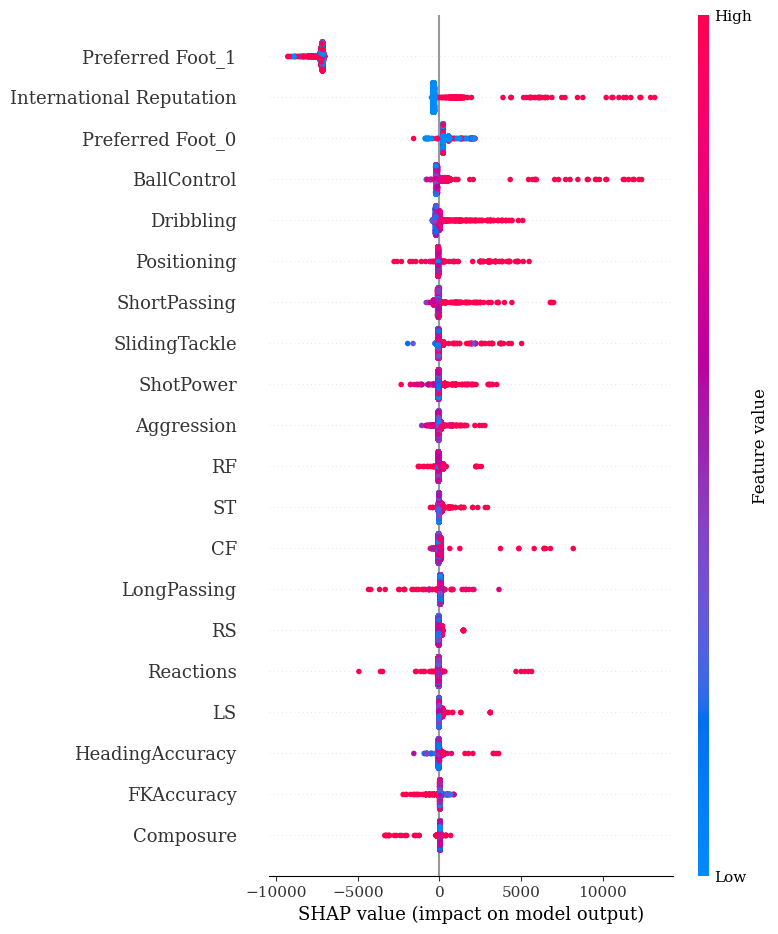

In [139]:
shap.summary_plot(shap_values, X_test_encoded)

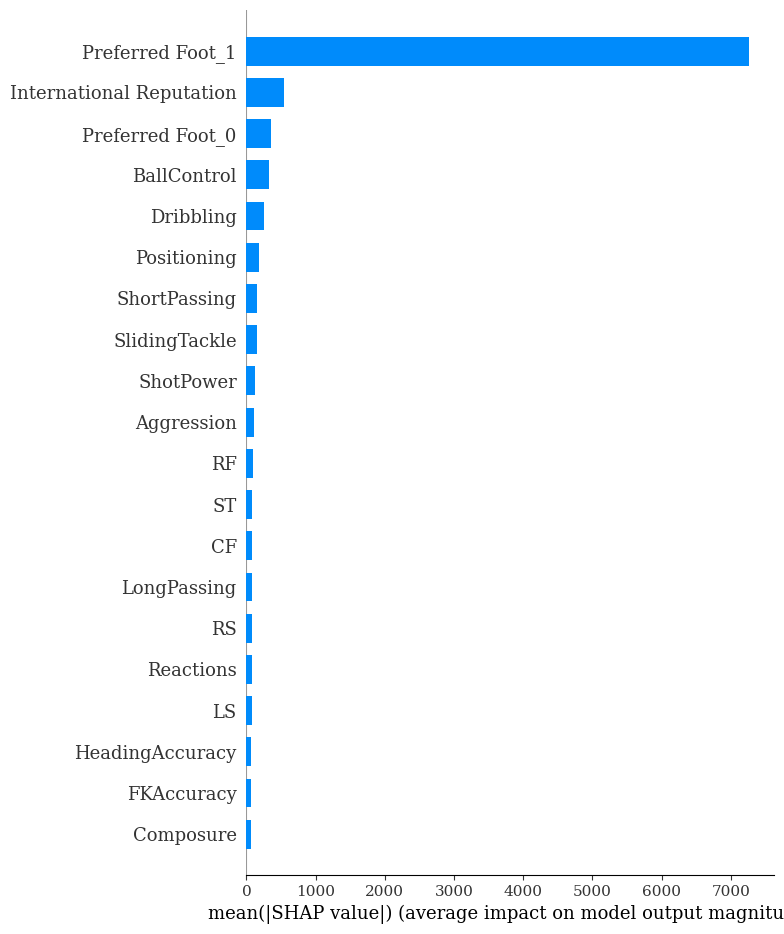

In [140]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

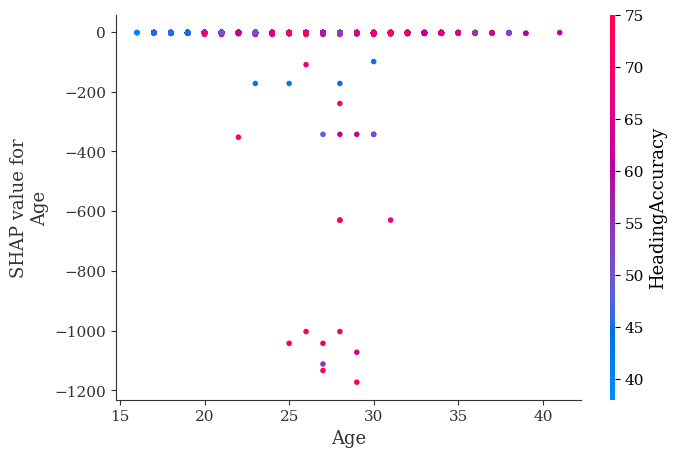

In [141]:
# Generar un gráfico de dependencia para la variable 'Age'
shap.dependence_plot('Age', shap_values.values, X_test_encoded)